<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.786450,37.858902,89.089755,-0.020816,225.714292,225.735180,-0.020888
1,0.0,1.0,66.651309,45.393868,98.836638,-0.001985,220.879829,220.871419,0.008411
2,0.0,2.0,77.556357,72.661525,65.687590,-0.001324,225.904147,225.900145,0.004002
3,0.0,3.0,75.890695,53.007668,96.040482,-0.027055,234.911791,234.929124,-0.017334
4,0.0,4.0,80.034190,48.716385,71.281210,0.024436,210.056221,210.032460,0.023761
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,59.015685,22.537461,87.301417,-0.039362,178.815200,178.861507,-0.046307
19996,999.0,16.0,87.897622,92.291723,38.744475,-0.007573,228.926246,228.920393,0.005853
19997,999.0,17.0,58.562363,55.909210,41.893561,0.006065,166.371200,166.367896,0.003304
19998,999.0,18.0,71.659366,44.078990,52.591063,-0.014568,178.314850,178.327699,-0.012849


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    88.786450  37.858902  89.089755 -0.020816  225.714292   
      1.0    66.651309  45.393868  98.836638 -0.001985  220.879829   
      2.0    77.556357  72.661525  65.687590 -0.001324  225.904147   
      3.0    75.890695  53.007668  96.040482 -0.027055  234.911791   
      4.0    80.034190  48.716385  71.281210  0.024436  210.056221   
...                ...        ...        ...       ...         ...   
999.0 15.0   59.015685  22.537461  87.301417 -0.039362  178.815200   
      16.0   87.897622  92.291723  38.744475 -0.007573  228.926246   
      17.0   58.562363  55.909210  41.893561  0.006065  166.371200   
      18.0   71.659366  44.078990  52.591063 -0.014568  178.314850   
      19.0   99.123412  72.685475  81.314272 -0.000249  263.122909   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.735180 -0.020888  
      1.0    220.871419  0.008411  
      2.0    225.900145  0.004002  
      3.0    234.929124 -0.017334  
      4.0    210.032460  0.023761  
...                 ...       ...  
999.0 15.0   178.861507 -0.046307  
      16.0   228.920393  0.005853  
      17.0   166.367896  0.003304  
      18.0   178.327699 -0.012849  
      19.0   263.107877  0.015032  

[20000 rows x 7 columns]

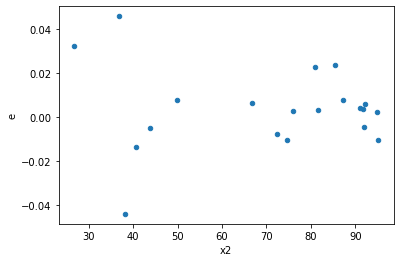

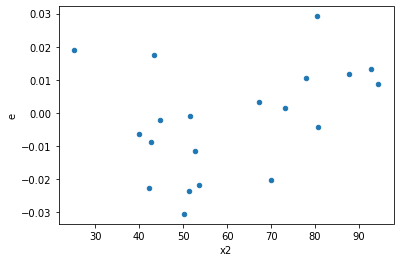

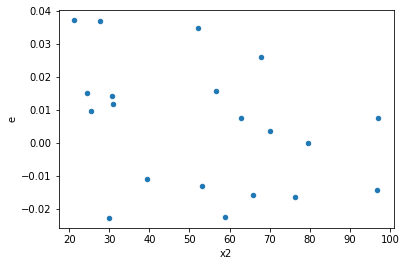

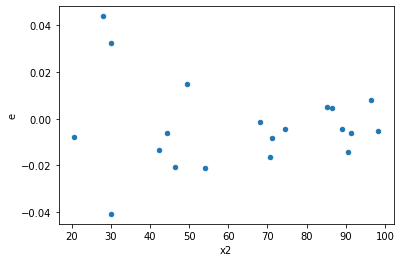

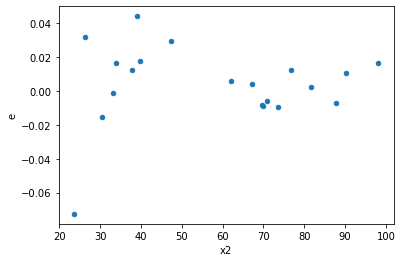

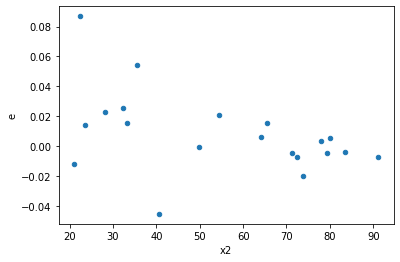

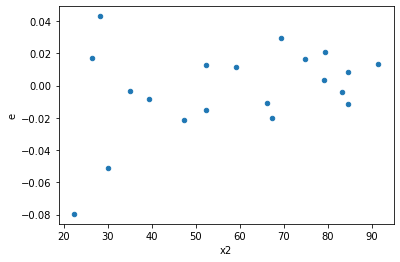

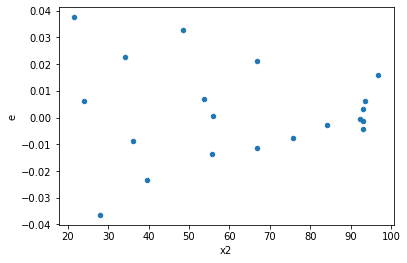

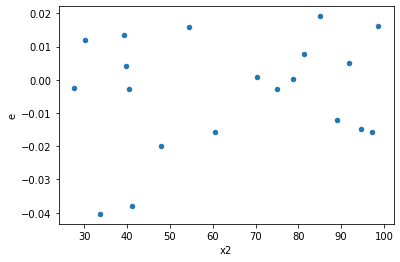

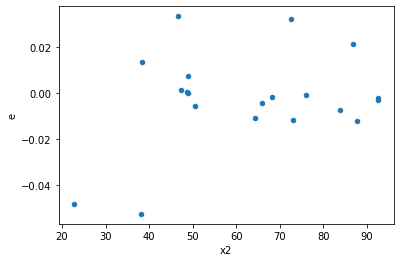

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,0.0011932108989896513,0.0012377290360163777,0.00017045869985566446,0.00017681843371662539,1.0373095293249686,0.9627032077427025,0.5186483961286488,0.48135160387135123,Reject005=1 : Homoscedasticity
2.0,8.0,6.0,0.0011654201769295983,0.002534833328297475,0.00014567752211619978,0.0004224722213829125,2.900050846869342,0.21144853516944817,0.8942757324152759,0.10572426758472409,Reject005=1 : Homoscedasticity
3.0,8.0,6.0,0.0018528285675256965,0.0036056415716545285,0.00023160357094071206,0.0006009402619424214,2.5946934216150557,0.2617318700650726,0.8691340649674637,0.1308659350325363,Reject005=1 : Homoscedasticity
4.0,8.0,6.0,0.0008494297516903742,0.003473276244862516,0.00010617871896129677,0.0005788793741437527,5.451934058036245,0.05329140200452498,0.9733542989977375,0.02664570100226249,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.0006623354140350518,0.009218573710166114,9.461934486215025e-05,0.0013169391014523021,13.91828598444572,0.002541670345927338,0.9987291648270363,0.001270835172963669,Reject005=0 : Heteroscedasticity
6.0,10.0,4.0,0.0032459347668663974,0.002737678533355324,0.00032459347668663973,0.000684419633338831,2.108544017351171,0.491833422661895,0.7540832886690525,0.2459167113309475,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.0008332976353641842,0.0032735351116683366,0.00011904251933774061,0.0004676478730954767,3.928410417530672,0.09155443584101275,0.9542227820794936,0.045777217920506375,Reject005=1 : Homoscedasticity
9.0,5.0,9.0,0.0002371804074878673,0.003989281749140052,4.743608149757346e-05,0.000443253527682228,9.344227298894875,0.004577888578913614,0.9977110557105432,0.002288944289456807,Reject005=0 : Heteroscedasticity
11.0,6.0,8.0,0.0011359666923073369,0.0022547888073360042,0.0001893277820512228,0.00028184860091700053,1.488680625016492,0.5873249477812907,0.7063375261093546,0.29366247389064537,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.004975008748699447,0.0022772531126828907,0.0007107155355284923,0.000325321873240413,0.45773851418416184,0.3242263200384032,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,0.0011932108989896513,0.0012377290360163777,0.00017045869985566446,0.00017681843371662539,1.0373095293249686,0.9627032077427025,Reject005=1 : Homoscedasticity
2.0,8.0,6.0,0.0011654201769295983,0.002534833328297475,0.00014567752211619978,0.0004224722213829125,2.900050846869342,0.21144853516944817,Reject005=1 : Homoscedasticity
3.0,8.0,6.0,0.0018528285675256965,0.0036056415716545285,0.00023160357094071206,0.0006009402619424214,2.5946934216150557,0.2617318700650726,Reject005=1 : Homoscedasticity
4.0,8.0,6.0,0.0008494297516903742,0.003473276244862516,0.00010617871896129677,0.0005788793741437527,5.451934058036245,0.05329140200452498,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.0006623354140350518,0.009218573710166114,9.461934486215025e-05,0.0013169391014523021,13.91828598444572,0.002541670345927338,Reject005=0 : Heteroscedasticity
6.0,10.0,4.0,0.0032459347668663974,0.002737678533355324,0.00032459347668663973,0.000684419633338831,2.108544017351171,0.491833422661895,Reject005=1 : Homoscedasticity
7.0,5.0,9.0,0.0009750431623299187,0.0012844489786271547,0.00019500863246598373,0.00014271655318079496,0.7318473617094344,0.7650441074562746,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.0008332976353641842,0.0032735351116683366,0.00011904251933774061,0.0004676478730954767,3.928410417530672,0.09155443584101275,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      675
Reject005=0 : Heteroscedasticity    325
Name: Result_test, dtype: int64